In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [3]:
df_org = pd.read_csv("train.csv")

In [4]:
df_org.sample(5)

,Unnamed: 0,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,...,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,검사결과코드,우범여부,핵심적발
16393,16393,25055996,2020-02-21,40,ZTW4X,072M35E,85B3TNA,NaN,H,B,...,10,4077006,8543709090,CN,CN,A,8.0,A,0,0
70194,70194,27274906,2020-09-04,20,CGMT6,71SP11L,JK7Z6VT,NaN,C,B,...,10,4077007,5516131000,CN,CN,FCN1,0.0,A,0,0
25589,25589,74482204,2020-03-19,10,VRNEF,82ZHWNL,NaN,NaN,C,B,...,10,4077010,7204490000,JP,JP,A,0.0,A,0,0
29715,29715,80762814,2020-04-06,40,EX3CM,J1TFI62,NaN,NaN,C,B,...,10,4076001,3926909000,JP,CN,C,6.5,A,0,0
40256,40256,77582262,2020-05-15,30,MSWFH,YEKIYZ4,TJX4DNH,PAVJZL,C,B,...,40,1351002,3921130000,MX,US,C,6.5,A,0,0


In [5]:
del df_org['검사결과코드']
del df_org['핵심적발']

In [6]:
# # 범주형 변수 지정
# discrete_columns = ['통관지세관부호', '신고번호',
#        '해외거래처부호', '특송업체부호', '수입통관계획코드', 
#        '수입거래구분코드', '신고인부호',
#        '수입종류코드', '징수형태코드', 
#        '운송수단유형코드', '반입보세구역부호', 
#        '적출국가코드', '관세율구분코드', ]

# # 범주형 변수들을 문자열로 지정 ('object' -> 'string')
# for var in discrete_columns:
#     df_org[var] = df_org[var].astype(str)

In [7]:
# 범주형 변수 지정
discrete_columns = ['통관지세관부호', '원산지국가코드', '신고번호', '신고일자',
       '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드', 
       '수입신고구분코드', '수입거래구분코드', '신고인부호',
       '수입종류코드', '징수형태코드', 
       '운송수단유형코드', '반입보세구역부호', 
       'HS10단위부호', '적출국가코드', '관세율구분코드', ]

# 범주형 변수들을 문자열로 지정 ('object' -> 'string')
for var in discrete_columns:
    df_org[var] = df_org[var].astype(str)

In [8]:
# # 수치형 변수 지정
# numeric_columns = ['신고중량(KG)', '과세가격원화금액', '우범여부']

# # 수치형 변수를 자연로그로 변환
# for var in ['신고중량(KG)', '과세가격원화금액']:
#     df_org[var] = df_org[var].apply(lambda x: np.log1p(x))

In [9]:
# 수치형 변수 지정
numeric_columns = ['신고중량(KG)', '과세가격원화금액', '관세율', '우범여부']

# 수치형 변수를 자연로그로 변환
for var in ['신고중량(KG)', '과세가격원화금액']:
    df_org[var] = df_org[var].apply(lambda x: np.log1p(x))

In [10]:
df_org.head(5)

,Unnamed: 0,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,...,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부
0,0,57298928,2020-01-01,121,2O5A2,82ZHWNL,nan,TQ18AK,D,B,...,4.844187,8.593963,10,2106003,8481900000,US,US,A,8.0,1
1,1,85092852,2020-01-01,30,305K5,5IS70LE,nan,nan,C,B,...,10.303820,13.258812,40,4077010,2106909099,US,US,A,8.0,0
2,2,63014158,2020-01-01,20,CGMT6,GJ5KBL3,R9ZQOG7,nan,D,B,...,10.067242,10.862759,40,4077007,6307909000,US,US,A,10.0,0
3,3,40175917,2020-01-01,40,QWUTG,PBYW02T,nan,nan,C,B,...,9.429564,14.388527,40,4077106,6505009090,CN,CN,A,8.0,0
4,4,11602631,2020-01-01,30,0X1CO,MCX0GJB,4Z9PX0Y,nan,C,B,...,9.661015,15.987683,40,2006075,6204320000,CN,CN,FCN1,5.2,1


# 원본 데이터셋

In [11]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76837 entries, 0 to 76836
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  76837 non-null  int64  
 1   신고번호        76837 non-null  object 
 2   신고일자        76837 non-null  object 
 3   통관지세관부호     76837 non-null  object 
 4   신고인부호       76837 non-null  object 
 5   수입자부호       76837 non-null  object 
 6   해외거래처부호     76837 non-null  object 
 7   특송업체부호      76837 non-null  object 
 8   수입통관계획코드    76837 non-null  object 
 9   수입신고구분코드    76837 non-null  object 
 10  수입거래구분코드    76837 non-null  object 
 11  수입종류코드      76837 non-null  object 
 12  징수형태코드      76837 non-null  object 
 13  신고중량(KG)    76837 non-null  float64
 14  과세가격원화금액    76837 non-null  float64
 15  운송수단유형코드    76837 non-null  object 
 16  반입보세구역부호    76837 non-null  object 
 17  HS10단위부호    76837 non-null  object 
 18  적출국가코드      76837 non-null  object 
 19  원산지국가코드     76837 non-nul

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler
rob_scaler = RobustScaler()
std_scaler = StandardScaler()

df_org['신고중량(KG)'] = std_scaler.fit_transform(df_org['신고중량(KG)'].values.reshape(-1,1))
df_org['과세가격원화금액'] = std_scaler.fit_transform(df_org['과세가격원화금액'].values.reshape(-1,1))

# 훈련/시험 데이터셋 분할
# 이후 레이블 인코딩 진행

In [13]:
df_train = df_org.iloc[:int(len(df_org)*0.7), :]
df_test = df_org.iloc[int(len(df_org)*0.7):, :]

print(df_train.shape,  df_test.shape)

(53785, 23) (23052, 23)


In [14]:
label_encoding_ref = {}
for var in discrete_columns:
    label_encoding_ref[var] = {code: i+1 for i, code in enumerate(df_train[var].unique())}
    df_train[var] = [label_encoding_ref[var][x] for x in df_train[var]]
    df_test[var] = [label_encoding_ref[var].get(x,0) for x in df_test[var]]

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

<ipython-input-14-3b4c36c0b28d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[var] = [label_encoding_ref[var][x] for x in df_train[var]]
<ipython-input-14-3b4c36c0b28d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[var] = [label_encoding_ref[var].get(x,0) for x in df_test[var]]


In [15]:
df_train.info(),  df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53785 entries, 0 to 53784
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53785 non-null  int64  
 1   신고번호        53785 non-null  int64  
 2   신고일자        53785 non-null  int64  
 3   통관지세관부호     53785 non-null  int64  
 4   신고인부호       53785 non-null  int64  
 5   수입자부호       53785 non-null  int64  
 6   해외거래처부호     53785 non-null  int64  
 7   특송업체부호      53785 non-null  int64  
 8   수입통관계획코드    53785 non-null  int64  
 9   수입신고구분코드    53785 non-null  int64  
 10  수입거래구분코드    53785 non-null  int64  
 11  수입종류코드      53785 non-null  int64  
 12  징수형태코드      53785 non-null  int64  
 13  신고중량(KG)    53785 non-null  float64
 14  과세가격원화금액    53785 non-null  float64
 15  운송수단유형코드    53785 non-null  int64  
 16  반입보세구역부호    53785 non-null  int64  
 17  HS10단위부호    53785 non-null  int64  
 18  적출국가코드      53785 non-null  int64  
 19  원산지국가코드     53785 non-nul

(None, None)

# 원핫인코딩 진행할 때 데이터셋 프로세스

# * 원핫 진행할 때 이 셀로 시작 *

In [15]:
# one-hot-encoding
# 예) A,B,C 3개의 클래스가 있는 범주형 변수를 다음과 같이 변환
# A -> [1,0,0] / B -> [0,1,0] / C -> [0,0,1]

# 원핫인코더 로딩
from sklearn.preprocessing import  OneHotEncoder
# 원핫인코더 활성화
xgbohe = OneHotEncoder(categories="auto", handle_unknown='ignore')
# 훈련데이터: 범주형 변수만 분리하여 원핫인코딩 적용
df_train_cat = xgbohe.fit_transform(df_train[discrete_columns])
df_train_cat = pd.DataFrame(df_train_cat.toarray(), 
                                columns = xgbohe.get_feature_names(discrete_columns))
# 수치형 변수 분리
df_train_num = df_train[numeric_columns]

# 원핫인코딩된 범주형 변수와 수치형 변수 재결합
df_train = pd.concat([df_train_num, df_train_cat], axis=1)

In [16]:
df_eval_cat = xgbohe.fit_transform(df_eval[discrete_columns])
df_eval_cat = pd.DataFrame(df_eval_cat.toarray(), 
                                columns = xgbohe.get_feature_names(discrete_columns))
# 수치형 변수 분리
df_eval_num = df_train[numeric_columns]

# 원핫인코딩된 범주형 변수와 수치형 변수 재결합
df_eval_onehot = pd.concat([df_eval_cat, df_eval_num], axis=1)

MemoryError: Unable to allocate 18.0 GiB for an array with shape (52444, 46102) and data type float64

In [17]:
# 테스트데이터: 범주형 변수만 분리하여 원핫인코딩 적용
df_test_cat = xgbohe.transform(df_test[discrete_columns])
df_test_cat = pd.DataFrame(df_test_cat.toarray(), 
                               columns = xgbohe.get_feature_names(discrete_columns))
# 수치형 변수 분리
df_test_num = df_test[numeric_columns]
# 원핫인코딩된 범주형 변수와 수치형 변수 재결합
df_test_onehot = pd.concat([df_test_num, df_test_cat], axis=1)

In [ ]:
df_train_onehot, df_eval_onehot, df_test_onehot

# 원핫 혹은 레이블 인코딩 완료
# 완전한 데이터셋 구성 후 분리

In [17]:
df_train_x = df_train
df_train_y = df_train_x.pop("우범여부")

# df_train_x = df_train_onehot
# df_train_y = df_train_x.pop("우범여부")

In [18]:
df_test_x = df_test
df_test_y = df_test_x.pop("우범여부")

# df_test_x = df_test_onehot
# df_test_y = df_test_x.pop("우범여부")

In [19]:
df_train_x.info(),df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53785 entries, 0 to 53784
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53785 non-null  int64  
 1   신고번호        53785 non-null  int64  
 2   신고일자        53785 non-null  int64  
 3   통관지세관부호     53785 non-null  int64  
 4   신고인부호       53785 non-null  int64  
 5   수입자부호       53785 non-null  int64  
 6   해외거래처부호     53785 non-null  int64  
 7   특송업체부호      53785 non-null  int64  
 8   수입통관계획코드    53785 non-null  int64  
 9   수입신고구분코드    53785 non-null  int64  
 10  수입거래구분코드    53785 non-null  int64  
 11  수입종류코드      53785 non-null  int64  
 12  징수형태코드      53785 non-null  int64  
 13  신고중량(KG)    53785 non-null  float64
 14  과세가격원화금액    53785 non-null  float64
 15  운송수단유형코드    53785 non-null  int64  
 16  반입보세구역부호    53785 non-null  int64  
 17  HS10단위부호    53785 non-null  int64  
 18  적출국가코드      53785 non-null  int64  
 19  원산지국가코드     53785 non-nul

(None, None)

In [20]:
train_part_x = df_train_x.loc[:,["신고번호", "통관지세관부호", "신고인부호", "수입자부호"
                                 ,"해외거래처부호", "특송업체부호", "수입통관계획코드"
                                 ,"수입거래구분코드", "수입종류코드", "징수형태코드"
                                ,"신고중량(KG)", "과세가격원화금액", "운송수단유형코드"
                                ,"반입보세구역부호", "원산지국가코드", "관세율구분코드"
                                ]]



test_part_x = df_test_x.loc[:, ["신고번호", "통관지세관부호", "신고인부호", "수입자부호"
                                 ,"해외거래처부호", "특송업체부호", "수입통관계획코드"
                                 ,"수입거래구분코드", "수입종류코드", "징수형태코드"
                               ,"신고중량(KG)", "과세가격원화금액", "운송수단유형코드"
                               ,"반입보세구역부호", "원산지국가코드", "관세율구분코드"
                               ]]

# Imbalanced Sampling
# * SMOTE *

In [21]:
from imblearn.over_sampling import *

In [22]:
smote = SMOTE(random_state=11, sampling_strategy='all')
df_train_over_x, df_train_over_y = smote.fit_resample(train_part_x, df_train_y)
df_train_over_x.info(), df_train_over_y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83112 entries, 0 to 83111
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   신고번호      83112 non-null  int64  
 1   통관지세관부호   83112 non-null  int64  
 2   신고인부호     83112 non-null  int64  
 3   수입자부호     83112 non-null  int64  
 4   해외거래처부호   83112 non-null  int64  
 5   특송업체부호    83112 non-null  int64  
 6   수입통관계획코드  83112 non-null  int64  
 7   수입거래구분코드  83112 non-null  int64  
 8   수입종류코드    83112 non-null  int64  
 9   징수형태코드    83112 non-null  int64  
 10  신고중량(KG)  83112 non-null  float64
 11  과세가격원화금액  83112 non-null  float64
 12  운송수단유형코드  83112 non-null  int64  
 13  반입보세구역부호  83112 non-null  int64  
 14  원산지국가코드   83112 non-null  int64  
 15  관세율구분코드   83112 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 10.1 MB


(None,
 0        1
 1        0
 2        0
 3        0
 4        1
         ..
 83107    1
 83108    1
 83109    1
 83110    1
 83111    1
 Name: 우범여부, Length: 83112, dtype: int64)

In [23]:
df_eval_over_x, df_eval_over_y = smote.fit_resample(eval_part_x, df_eval_y)
df_eval_over_x.info(), df_eval_over_y

NameError: name 'eval_part_x' is not defined

# 샘플링 이후 데이터 분포 확인


C:\Users\LEE JaeBin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE JaeBin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE JaeBin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE JaeBin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE JaeBin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE JaeBin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarni

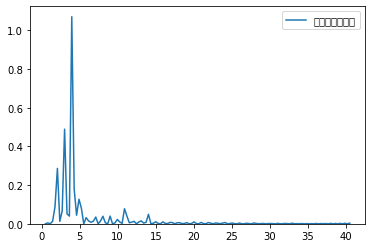

In [30]:
sns.kdeplot(df_train_over_x["통관지세관부호"])

# 모델 생성 / 학습 / 평가

In [31]:
# XGBoost 모델 생성
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import f1_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [32]:
xgb_clf = XGBClassifier(n_estimators=50, max_depth=4, n_jobs=-1, reg_lambda=1)

eval_set = [(df_train_over_x, df_train_over_y), (eval_part_x, df_eval_y)]

xgb_clf.fit(df_train_over_x, df_train_over_y, eval_metric=["logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.60227	validation_1-logloss:0.61495
[1]	validation_0-logloss:0.55203	validation_1-logloss:0.57591
[2]	validation_0-logloss:0.52284	validation_1-logloss:0.55373
[3]	validation_0-logloss:0.50305	validation_1-logloss:0.54069
[4]	validation_0-logloss:0.48831	validation_1-logloss:0.53100
[5]	validation_0-logloss:0.47228	validation_1-logloss:0.51968
[6]	validation_0-logloss:0.46364	validation_1-logloss:0.51513
[7]	validation_0-logloss:0.45659	validation_1-logloss:0.51082
[8]	validation_0-logloss:0.44876	validation_1-logloss:0.50582
[9]	validation_0-logloss:0.44335	validation_1-logloss:0.50237
[10]	validation_0-logloss:0.43620	validation_1-logloss:0.49869
[11]	validation_0-logloss:0.43273	validation_1-logloss:0.49806
[12]	validation_0-logloss:0.42835	validation_1-logloss:0.49559
[13]	validation_0-logloss:0.42529	validation_1-logloss:0.49451
[14]	validation_0-logloss:0.42101	validation_1-logloss:0.49207
[15]	validation_0-logloss:0.41649	validation_1-logloss:0.48957
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'XGBoost Log Loss')

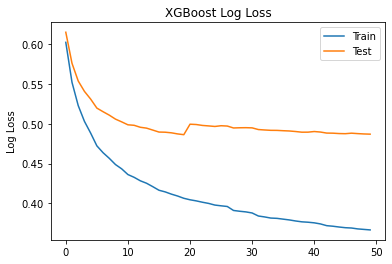

In [33]:
# 모델 성능 시각화

from matplotlib import pyplot
# retrieve performance metrics
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')

In [34]:
# evaluate xgboost model
print("------Evaluating xgboost model------")
# Predict
test_pred = xgb_clf.predict_proba(test_part_x)[:,1]
# Calculate auc
xgb_auc = roc_auc_score(df_test_y, test_pred)
print(xgb_auc)

------Evaluating xgboost model------
0.8123318272478992


In [35]:
def inspection_performance(predicted_fraud, test_fraud):
        
    Inspect_Rate=[]
    Precision=[]
    Recall=[]
    
    for i in range(0,101,1):
        
        threshold = np.percentile(predicted_fraud, i)
        # Precision = number of frauds / number of inspection
        precision = np.mean(test_fraud[predicted_fraud >= threshold])
        # Recall = number of inspected frauds / number of frauds
        recall = sum(test_fraud[predicted_fraud >= threshold])/sum(test_fraud)
        # Save values
        Inspect_Rate.append(100-i)
        Precision.append(precision)
        Recall.append(recall)
        
    
    compiled_conf_matrix = pd.DataFrame({
        'Inspect_Rate':Inspect_Rate,
        'Precision':Precision,
        'Recall':Recall
    })

    return compiled_conf_matrix

In [36]:
basic_performance = inspection_performance(test_pred, df_test_y.astype(float))

In [37]:
# 검사율 1~10% 지정 시 Precision 및 Recall 분석
# Precision (적중률) = (검사선별된 우범건수)/(검사선별 건수)
# Recall (적발률) = (검사선별된 우범건수) / (전체 우범건수)
basic_performance.iloc[range(99,89,-1),:]

,Inspect_Rate,Precision,Recall
99,1,0.727273,0.031647
98,2,0.691558,0.060186
97,3,0.664502,0.086748
96,4,0.666667,0.115852
95,5,0.665800,0.144674
94,6,0.655471,0.170952
93,7,0.654275,0.198926
92,8,0.644715,0.224075
91,9,0.640173,0.250353
90,10,0.628497,0.272958


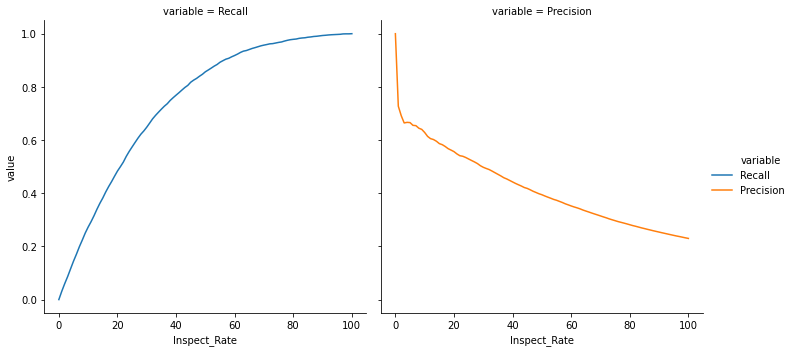

In [38]:
data = pd.melt(basic_performance, 
               id_vars = ['Inspect_Rate'],
               value_vars = ['Recall','Precision'])

sns.relplot(data=data,
            kind='line',
            x="Inspect_Rate", 
            y="value", 
            hue='variable',
            col="variable")

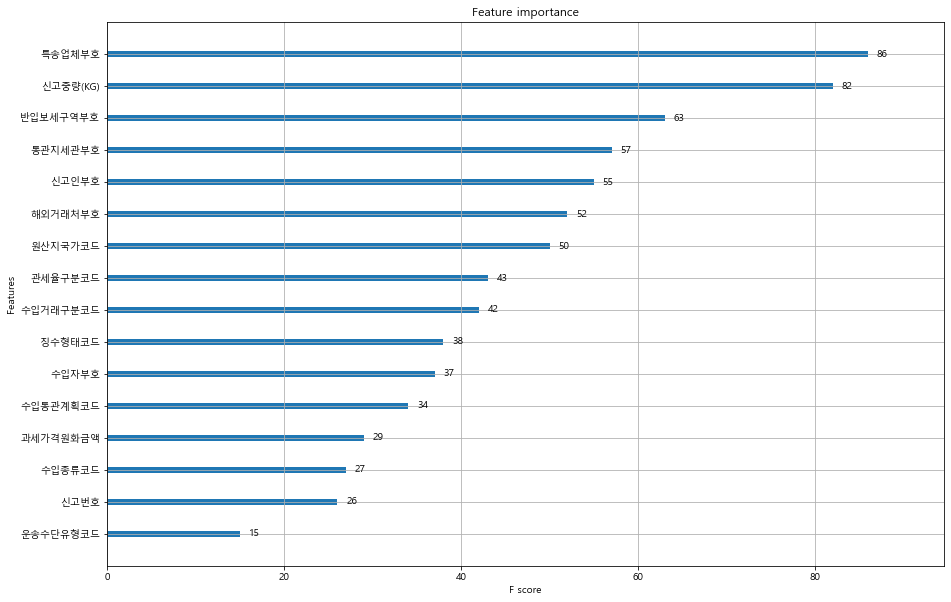

In [39]:
# 모델에 기여도가 높은 변수 시각화
from xgboost import plot_importance
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (15,10)
plot_importance(xgb_clf, max_num_features=30)
plt.show()

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
y_preds = xgb_clf.predict(test_part_x)

In [42]:
print("accuracy score for trained data",accuracy_score(df_train_over_y,xgb_clf.predict(df_train_over_x)))
print("accuracy score is",accuracy_score(df_test_y,y_preds))

print("Confusion matrix",confusion_matrix(df_test_y,y_preds))

print("Report",classification_report(df_test_y,y_preds))

accuracy score for trained data 0.8349118726707204
accuracy score is 0.7701717855283706
Confusion matrix [[9574 2255]
 [1277 2262]]
Report               precision    recall  f1-score   support

           0       0.88      0.81      0.84     11829
           1       0.50      0.64      0.56      3539

    accuracy                           0.77     15368
   macro avg       0.69      0.72      0.70     15368
weighted avg       0.79      0.77      0.78     15368



# XGB Regressor

In [43]:
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_reg.fit(df_train_over_x, df_train_over_y, eval_set=eval_set, early_stopping_rounds=20)

[0]	validation_0-rmse:0.48083	validation_1-rmse:0.49479
[1]	validation_0-rmse:0.46463	validation_1-rmse:0.49217
[2]	validation_0-rmse:0.45106	validation_1-rmse:0.48009
[3]	validation_0-rmse:0.43948	validation_1-rmse:0.47934
[4]	validation_0-rmse:0.42893	validation_1-rmse:0.47931
[5]	validation_0-rmse:0.42063	validation_1-rmse:0.47349
[6]	validation_0-rmse:0.41292	validation_1-rmse:0.46630
[7]	validation_0-rmse:0.40636	validation_1-rmse:0.46014
[8]	validation_0-rmse:0.40128	validation_1-rmse:0.45521
[9]	validation_0-rmse:0.39632	validation_1-rmse:0.45110
[10]	validation_0-rmse:0.39249	validation_1-rmse:0.44855
[11]	validation_0-rmse:0.38878	validation_1-rmse:0.44515
[12]	validation_0-rmse:0.38566	validation_1-rmse:0.44231
[13]	validation_0-rmse:0.38309	validation_1-rmse:0.44146
[14]	validation_0-rmse:0.38064	validation_1-rmse:0.44114
[15]	validation_0-rmse:0.37855	validation_1-rmse:0.43916
[16]	validation_0-rmse:0.37635	validation_1-rmse:0.43735
[17]	validation_0-rmse:0.37466	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'XGBoost rmse')

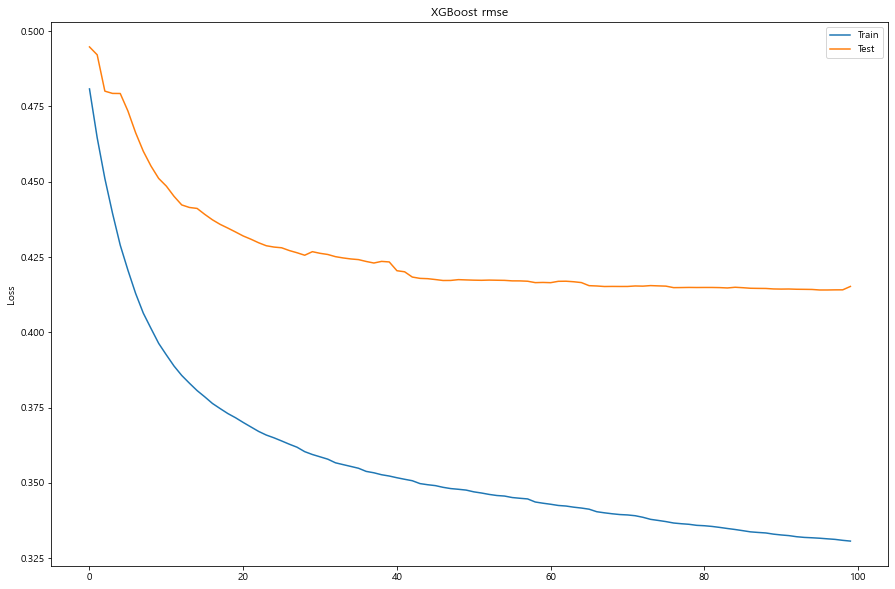

In [44]:
# 모델 성능 시각화

from matplotlib import pyplot
# retrieve performance metrics
results = xgb_reg.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Loss')
pyplot.title('XGBoost rmse')

In [45]:
xgb_reg.best_ntree_limit

96

In [46]:
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
results = cross_val_score(xgb_reg, df_train_over_x, df_train_over_y, cv=kfold)
y_test_pred = xgb_reg.predict(test_part_x)

mse = mean_squared_error(y_test_pred, df_test_y)
y_pred = xgb_reg.predict(test_part_x)
# pd.DataFrame(y_pred)

In [47]:
from numpy import absolute

scores = absolute(results)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.517 (0.007)


In [48]:
r_sq = xgb_reg.score(df_train_over_x, df_train_over_y)
print(r_sq)
print(explained_variance_score(y_pred, df_test_y))

0.560172281464316
-1.6292911179185983


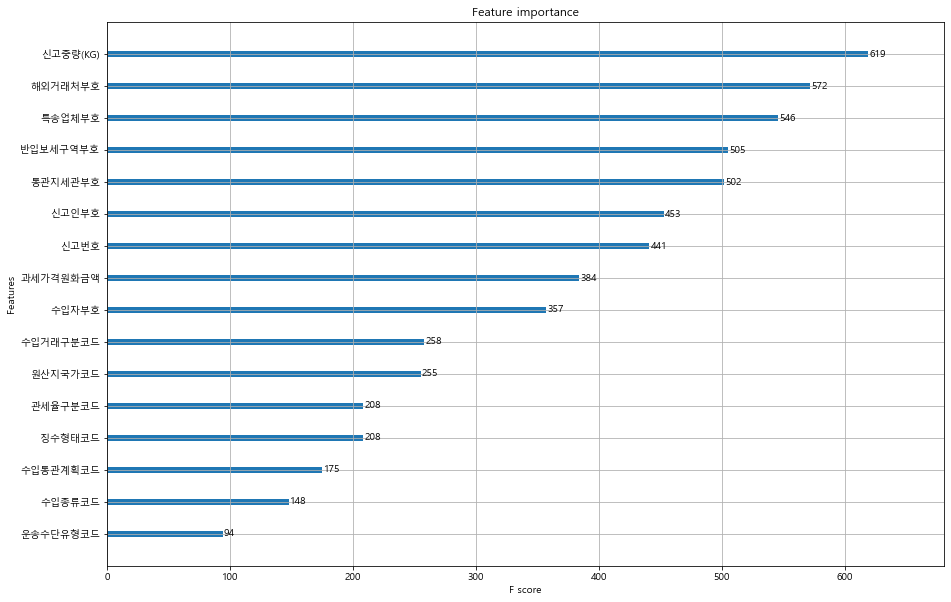

In [49]:
# 모델에 기여도가 높은 변수 시각화
from xgboost import plot_importance
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (15,10)
plot_importance(xgb_reg, max_num_features=30)
plt.show()